# MOwNiT 
## Laboratorium
### Znajdowanie pierwiastków

Do poszukiwania pierwiastków funkcji w Julii używamy pakietu Roots

```julia
Pkg.add("Roots")
Pkg.add("ForwardDiff")
```

In [1]:
using Pkg
# Pkg.add("Roots")
# Pkg.add("ForwardDiff")
using Roots  
using Plots
using ForwardDiff

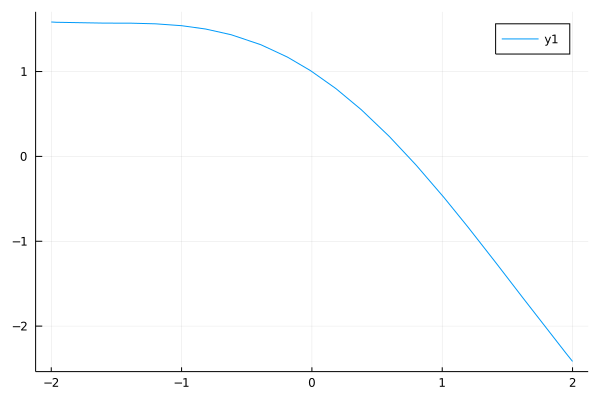

In [2]:
# przykładowa funkcja do testów
f(x) = cos(x) - x
plot(f, -2, 2)

Funkcja <i> find_zero</i>  dobiera odpowiedni algorytm w zależności od sposobu wywołania.


### 1. Metody wykorzytujące  przedział i zmianę znaku

#### 1.1 Metoda bisekcji - jesli wywołamy fzero z podaniem  przedziału (tutaj (0,1))

In [3]:
x = find_zero(f, (0, 1),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601563e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

0.7390851332151607

In [4]:
# mozna wyspecyfikowac wprost
x = find_zero(f, (0, 1), Bisection(),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601563e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

0.7390851332151607

#### Sprawdzanie, czy znaleźliśmy 0

In [5]:
#Sprawdzamy czy znaleźliśmy 0
iszero(f(x))

true

In [6]:
# można też sprawdzić, czy funkcja zmienia znak dla lewego i prawego sąsiada miejsca zerowego.
sign(f(prevfloat(x))) *sign(f(nextfloat(x))) 

-1.0

In [7]:
# czasem algorytm znajduje najlepsze przybliżenie 0
g(x) = sin(x)
x = find_zero(g, (pi/2, 3pi/2))
x, g(x)

(3.141592653589793, 1.2246467991473532e-16)

In [8]:
# nie jest to dokładnie 0, ale ...
iszero(g(x))

false

In [9]:
#... najbliższy lewy albo prawy sąsiad leży po przeciwnej stronie osi x  niż nasze 0.
g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0

true

#### 1.2 Metoda regula falsi

In [10]:
find_zero(f, (0, 1), FalsePosition(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1.118751109680031e-154,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.68507335732604513,	 fx₃ = 0.089299276481859979
x₄ = 0.73629899761365403,	 fx₄ = 0.0046600390381426049
x₅ = 0.7390895164441823,	 fx₅ = -7.3358319172545094e-06
x₆ = 0.73908513051468816,	 fx₆ = 4.5195431841449363e-09
x₇ = 0.73908513321515801,	 fx₇ = 4.4408920985006262e-15
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

In [11]:
# do dyspozycji mamy  12 wersji algorytmu regula falsi
find_zero(f, (0, 1), FalsePosition(12), verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{12}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1.118751109680031e-154,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.68507335732604513,	 fx₃ = 0.089299276481859979
x₄ = 0.73629899761365403,	 fx₄ = 0.0046600390381426049
x₅ = 0.7390895164441823,	 fx₅ = -7.3358319172545094e-06
x₆ = 0.73908513051468816,	 fx₆ = 4.5195431841449363e-09
x₇ = 0.73908513321515801,	 fx₇ = 4.4408920985006262e-15
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

### 2. Metody korzystające z pochodnych

#### 2.1 Metoda Newtona, potrzebuje punktu startowego i wykorzystuje pochodną funkcji.

Aby użyć Metody Newtona, można skorzystać z pakietu ForwardDiff, aby obliczyć pochodną funkcji. 

In [12]:
# definujemy D(f) obliczającą  funkcje pochodną 
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

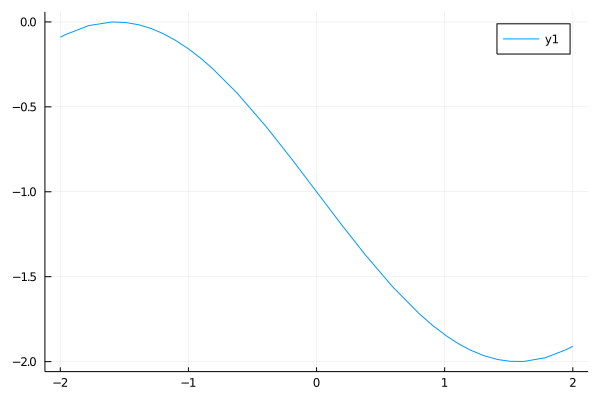

In [13]:
plot(D(f), -2,2)

In [14]:
#wywolanie metody Newtona
find_zero((f, D(f)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.75036386784024389,	 fx₃ = -0.018923073822117442
x₄ = 0.73911289091136168,	 fx₄ = -4.6455898990771516e-05
x₅ = 0.73908513338528403,	 fx₅ = -2.8472058044570758e-10
x₆ = 0.73908513321516067,	 fx₆ = 0



0.7390851332151607

#### 2.2 Metoda Halleya (potrzebuje pierwszej i drugiej pochodnej)

In [15]:
DD(f) = x->ForwardDiff.derivative(D(f), float(x))
find_zero((f, D(f), DD(f)), 0.0, Roots.Halley(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations ≈ 15
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 0.66666666666666663,	 fx₂ = 0.11922059411028141
x₃ = 0.73903926244631024,	 fx₃ = 7.6769092960393692e-05
x₄ = 0.73908513321514946,	 fx₄ = 1.865174681370263e-14
x₅ = 0.73908513321516056,	 fx₅ = 1.1102230246251565e-16



0.7390851332151606

### 3. Metody korzystające z przybliżenia pochodnej

#### 3.1 Domyślna metoda bazuje na metodzie z <a href="http://www.hpl.hp.com/hpjournal/pdfs/IssuePDFs/1979-12.pdf"> kalkulatorów HP-34</a> , używa metody siecznych
oraz metody bazującej na przedziale wg artykułu:

<a href="http://na.math.kit.edu/alefeld/download/1995_Algorithm_748_Enclosing_Zeros_of_Continuous_Functions.pdf">G. E. Alefeld, F. A. Potra, and
Y. Shi, "Algorithm 748: enclosing zeros of continuous functions," ACM
Trans. Math. Softw. 21, 327–344 (1995), DOI: 10.1145/210089.210111. </a>

In [16]:
x = find_zero(f, 0,   verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 4
* function evaluations ≈ 10
* stopped as f(x_n) = 0
* Note: Used bracketing method AlefeldPotraShi() on  [0.0,0.9999969722835389]

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
(a₃, b₃) = ( 0, 0.9999969722835389 )
(a₄, b₄) = ( 1.1187488515059306e-154, 0.9999969722835389 )
(a₅, b₅) = ( 0.73848198557107825, 0.73967384145392068 )
(a₆, b₆) = ( 0.73848198557107825, 0.73908513321516067 )



0.7390851332151607

Metody find_zero dla wyzszych rzędów to wariacje metody Newtona, które nie korzystaja z pochodnej, ale ja przyblizają.


#### 3.2 Metoda siecznych

In [17]:
# wywołanie find_zero używając punktu startowego (a nie przedziału) 
# oraz opcji order=1   wykorzystuje metodę siecznych  
x = find_zero(f, 0, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant()
* iterations: 7
* function evaluations ≈ 9
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908511212853889,	 fx₇ = 3.5290823707789798e-08
x₈ = 0.73908513321500136,	 fx₈ = 2.6656454821250009e-13
x₉ = 0.73908513321516067,	 fx₉ = 0



0.7390851332151607

In [18]:
# metoda siecznych może być wywołana bezpośrednio 
# implementacja taka sama jak find_zero(f, 0, Order1()), ale bez
# narzutów frameworku oraz mniejsza ilość sprawdzanych warunków zbieżności - szybsza
Roots.secant_method(f, 0)

0.7390851332151607

In [19]:
# mozemy podać przedział
Roots.secant_method(f, (0,1))

0.7390851332151607

#### 3.3 Metoda Steffensena 
przybliża pochodną poprzez  (f(x + f(x)) - f(x))/f(x)  
aby ja wywołać podajemy punkt startowy oraz order 2

In [20]:
x = find_zero(f, 0, Order2(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order2()
* iterations: 6
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513304090806,	 fx₇ = 2.9163127468478933e-10
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

In [21]:
# mozliwe sa jeszcze rzędy 5, 8 i 16
x = find_zero(f, 0, Order8(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order8()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513321516067,	 fx₇ = 0



0.7390851332151607

Można użyć funkcji fzero do znajdowania nieciagłości

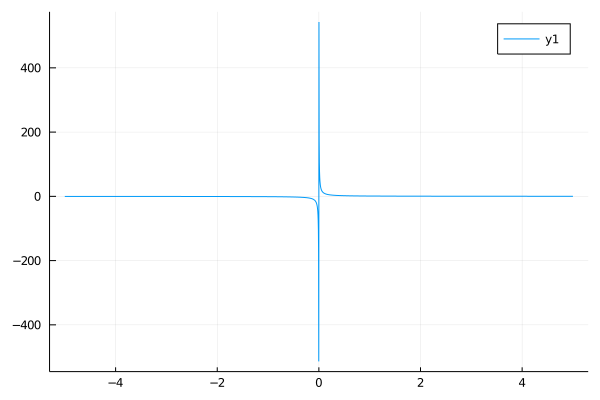

In [22]:
plot(x -> 1/x)

In [23]:
find_zero(x -> 1/x, (-1, 1), verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 61
* function evaluations ≈ 64
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( -1, 0 )
(a₁, b₁) = ( -1.118751109680031e-154, 0 )
(a₂, b₂) = ( -1.1272010346794983e-231, 0 )
(a₃, b₃) = ( -3.5491565585003241e-270, 0 )
(a₄, b₄) = ( -1.988135013128901e-289, 0 )
(a₅, b₅) = ( -4.7036486372562232e-299, 0 )
(a₆, b₆) = ( -7.2341601287786131e-304, 0 )
(a₇, b₇) = ( -2.8369691695966818e-306, 0 )
(a₈, b₈) = ( -1.7765824089018436e-307, 0 )
(a₉, b₉) = ( -4.4458018696345059e-308, 0 )
(a₁₀, b₁₀) = ( -2.2229009348172529e-308, 0 )
(a₁₁, b₁₁) = ( -1.1114504674086265e-308, 0 )
(a₁₂, b₁₂) = ( -5.5572523370431324e-309, 0 )
(a₁₃, b₁₃) = ( -2.7786261685215662e-309, 0 )
(a₁₄, b₁₄) = ( -1.3893130842607831e-309, 0 )
(a₁₅, b₁₅) = ( -6.9465654213039155e-310, 0 )
(a₁₆, b₁₆) = ( -3.4732827106519577e-310, 0 )
(a₁₇, b₁₇) = ( -1.7366413553259789e-310, 0 )
(a₁₈, b₁₈) = ( -8.6832067766298943e-311, 0 

0.0

find_zeros - szukanie więcej niż jednego pierwiastka. Wykorzystuje podział przedziału na mniejsze podprzedziały

In [24]:
find_zeros(x ->(x-3)*x, -10, 10)

2-element Array{Float64,1}:
 0.0
 3.0

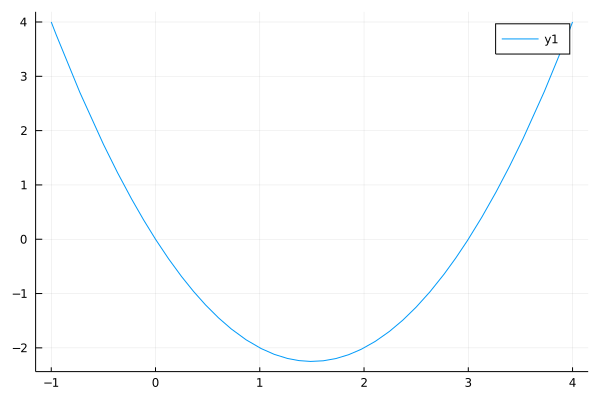

In [25]:
plot(x ->(x-3)*x,-1,4)

Więcej na https://docs.juliahub.com/Roots/o0Xsi/2.0.0/roots/

Wyciąganie informacji z przebiegu działania funkcji: https://docs.juliahub.com/Roots/o0Xsi/2.0.0/reference/#Tracking-iterations

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

 # ZADANIE A 
 Wybrać trzy metody poszukiwania pierwiastków:

    wykorzystującą przedział i zmianę znaku,

    wykorzystującą pochodną,

    wykorzystującą przybliżenie pochodnej

# 1
Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka ! (3 pkt)

In [26]:
using DataFrames

In [27]:
df_test = DataFrame(
    fun = String[],
    method = String[], 
    iterations = Int64[],
    counting_function = Int64[],
    root_x = Float64[],
    root_y = Float64[],
    correct_iszero = Bool[],
    signdiff = Float64[]
)

D(f) = x->ForwardDiff.derivative(f, float(x))


algorithms = [ "Roots.BisectionExact()"
    "Roots.Newton()"
    "Roots.Secant()"
];


In [28]:
f1(x) = sin(x) - x / 2 #1

f2(x) = 2 * x - exp( - x ) #2

f3(x) =  x * exp(-x) #3

f4(x) = (x + 3) * (x -1)^2 #5

f5(x) = x^3 #7

f6(x) = 20.0 * x / ( 100.0 * x * x + 1.0 ) # 10. The repeller


f6 (generic function with 1 method)

In [29]:
test_functions = [
    [f1, -4,   4],
    [f2, -0.5, 3],
    [f3, -0.1, 4],
    [f4, -4,   2],
    [f5, -1,   1],
    [f6,  -2,  2],
];

In [30]:
println("Tested function - f1\n\n\n")

index = 1
detected_roots = [
    find_zero(
        test_functions[index][1],
        (test_functions[index][2], test_functions[index][3]), 
        Bisection(),
        verbose=true),

    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true),
    
    find_zero(
        test_functions[index][1], 
        test_functions[index][2],   
        verbose=true) 
    ];

println("\n\n\nChecking correctness\n")

for i in 1:length(detected_roots)
    if detected_roots[i] != NaN
        root = detected_roots[i]
        println(algorithms[i])
        println("detected root: ",root)
        println("f(x): ",test_functions[index][1](root))
        println("iszero: ",iszero(test_functions[index][1](root)))
        println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ",
            sign(test_functions[index][1](prevfloat(root))) * 
            sign(test_functions[index][1](nextfloat(root))) )

        println("-------------------")
    end
end

Tested function - f1





Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 4 )



Results of univariate zero finding:

* Converged to: -1.895494267033981
* Algorithm: Roots.Newton()
* iterations: 6
* function evaluations ≈ 12
* stopped as f(x_n) = 0

Trace:
x₁ = -4,	 fx₁ = 2.7568024953079284
x₂ = -1.6103517191520549,	 fx₂ = -0.19404192788905972
x₃ = -1.9699916004393636,	 fx₃ = 0.06362172927963472
x₄ = -1.8984000905205811,	 fx₄ = 0.0023839348777178193
x₅ = -1.8954991329401036,	 fx₅ = 3.9852979347720918e-06
x₆ = -1.89549426704768,	 fx₆ = 1.1219802864559369e-11
x₇ = -1.8954942670339809,	 fx₇ = 0



Results of univariate zero finding:

* Converged to: -1.8954942670339807
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 4
* function evaluations ≈ 10
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Used bracketing method AlefeldPotraShi() on  [-4.0,-1.6103564656441494]

Trace:
x₁ = -3.9999939443988737,	 fx₁ = 2.7567955092884424
x₂ = -4,	 fx₂ = 2.7568024953079284
x₃ = -1.6103564656441494,	 fx₃ = -0.19403936693135537
(a₃, b₃) = ( -4, -1.6103564656441494 )
(a₄, b₄) = ( -2.6103564656441494, -1.6103564656441494 )
(a₅, b₅) = ( -1.8965351364679381, -1.8943814645521972 )
(a₆, b₆) = ( -1.8954942670339812, -1.8954942670339807 )






Checking correctness

Roots.BisectionExact()
detected root: 0.0
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0
-------------------
Roots.Newton()
detected root: -1.895494267033981
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0
-------------------
Roots.Secant()
detected root: -1.8954942670339807
f(x): -2.220446049250313e-16
iszero: false
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -0.0
-------------------


In [31]:
push!(df_test,
    ["f1", "bisection", 
        0, 3,
        0.0,
        0.0,
        true,
        -1.0
    ]
);
push!(df_test,
    ["f1", "newton", 
        6, 12,
        -1.895494267033981,
        0.0,
        true,
        -1.0
    ]
);
push!(df_test,
    ["f1", "secant", 
        4, 10,
        -1.8954942670339807,
        -2.220446049250313e-16,
        false,
        -0.0
    ]
);

In [32]:
println("Tested function - f2\n\n\n")

index = 2
detected_roots = [
    find_zero(
        test_functions[index][1],
        (test_functions[index][2], test_functions[index][3]), 
        Bisection(),
        verbose=true),

    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true),
    
    find_zero(
        test_functions[index][1], 
        test_functions[index][2],   
        verbose=true) 
    ];

println("\n\n\nChecking correctness\n")

for i in 1:length(detected_roots)
    if detected_roots[i] != NaN
        root = detected_roots[i]
        println(algorithms[i])
        println("detected root: ",root)
        println("f(x): ",test_functions[index][1](root))
        println("iszero: ",iszero(test_functions[index][1](root)))
        println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ",
            sign(test_functions[index][1](prevfloat(root))) * 
            sign(test_functions[index][1](nextfloat(root))) )

        println("-------------------")
    end
end

Tested function - f2





Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Bisection()
* iterations: 61
* function evaluations ≈ 64
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 3 )
(a₁, b₁) = ( 1.8645851828000517e-154, 3 )
(a₂, b₂) = ( 2.3749463526509723e-77, 3 )
(a₃, b₃) = ( 8.4488656465351915e-39, 3 )
(a₄, b₄) = ( 1.5924219408380846e-19, 3 )
(a₅, b₅) = ( 6.9121597334742546e-10, 3 )
(a₆, b₆) = ( 4.5537948608398438e-05, 3 )
(a₇, b₇) = ( 0.011688232421875, 3 )
(a₈, b₈) = ( 0.187255859375, 3 )
(a₉, b₉) = ( 0.187255859375, 0.74951171875 )
(a₁₀, b₁₀) = ( 0.187255859375, 0.3746337890625 )
(a₁₁, b₁₁) = ( 0.249786376953125, 0.3746337890625 )
(a₁₂, b₁₂) = ( 0.312103271484375, 0.3746337890625 )
(a₁₃, b₁₃) = ( 0.3433685302734375, 0.3746337890625 )
(a₁₄, b₁₄) = ( 0.3433685302734375, 0.35900115966796875 )
(a₁₅, b₁₅) = ( 0.35118484497070313, 0.35900115966796875 )
(a₁₆, b₁₆) = ( 0.35118484497070313, 0.35509300231933594 )
(a₁₇, b₁₇) = ( 0.35118484497070313, 0.35313892364501953 )
(a₁₈, b

Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = -0.5,	 fx₁ = -2.6487212707001282
x₂ = 0.22593138093880305,	 fx₂ = -0.3459100803334052
x₃ = 0.34956903840496134,	 fx₃ = -0.0058537718614606327
x₄ = 0.35173310106723366,	 fx₄ = -1.6496071875149454e-06
x₅ = 0.35173371124914737,	 fx₅ = -1.3100631690576847e-13
x₆ = 0.35173371124919584,	 fx₆ = 0



Results of univariate zero finding:

* Converged to: 0.35173371124919584
* Algorithm: Secant()
* iterations: 7
* function evaluations ≈ 11
* stopped as f(x_n) = 0

Trace:
x₁ = -0.49999394452721335,	 fx₁ = -2.6486991759979954
x₂ = -0.5,	 fx₂ = -2.6487212707001282
x₃ = -0.4993944527213352,	 fx₃ = -2.6465120996857889
x₄ = -0.43883972485485545,	 fx₄ = -2.4285861453806659
x₅ = 0.23598752829519332,	 fx₅ = -0.31781546731526622
x₆ = 0.33759522118465984,	 fx₆ = -0.038293590307646452
x₇ = 0.3515151454684694,	 fx₇ = -0.0005909022717622836
x₈ = 0.35173330802691177,	 fx₈ = -1.0900983661299435e-06
x₉ = 0.35173371123772912,	 fx₉ = -3.0999869338188546e-11






Checking correctness

Roots.BisectionExact()
detected root: 0.35173371124919584
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0
-------------------
Roots.Newton()
detected root: 0.35173371124919584
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0
-------------------
Roots.Secant()
detected root: 0.35173371124919584
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0
-------------------


In [33]:
push!(df_test,
    ["f2", "bisection", 
        61, 64,
        0.35173371124919584,
        0.0,
        true, -1.0
    ]
);
push!(df_test,
    ["f2", "newton", 
        5, 10,
        0.35173371124919584,
        0.0,
        true, -1.0
    ]
);
push!(df_test,
    ["f2", "secant", 
        7, 11,
        0.35173371124919584,
        0.0,
        true, -1.0
    ]
);

In [34]:
println("Tested function - f3\n\n\n")

index = 3
detected_roots = [
    find_zero(
        test_functions[index][1],
        (test_functions[index][2], test_functions[index][3]), 
        Bisection(),
        verbose=true),

    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true),
    
    find_zero(
        test_functions[index][1], 
        test_functions[index][2],   
        verbose=true) 
    ];

println("\n\n\nChecking correctness\n")

for i in 1:length(detected_roots)
    if detected_roots[i] != NaN
        root = detected_roots[i]
        println(algorithms[i])
        println("detected root: ",root)
        println("f(x): ",test_functions[index][1](root))
        println("iszero: ",iszero(test_functions[index][1](root)))
        println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ",
            sign(test_functions[index][1](prevfloat(root))) * 
            sign(test_functions[index][1](nextfloat(root))) )

        println("-------------------")
    end
end

Tested function - f3





Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 4 )



Results of univariate zero finding:

* Converged to: -4.498484366669896e-17
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations ≈ 8
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -0.10000000000000001,	 fx₁ = -0.11051709180756478
x₂ = -0.0090909090909090939,	 fx₂ = -0.0091739305173563594
x₃ = -8.1900081900081537e-05,	 fx₃ = -8.1906789798181728e-05
x₄ = -6.7070741053068539e-09,	 fx₄ = -6.7070741502916976e-09
x₅ = -4.498484366669896e-17,	 fx₅ = -4.498484366669896e-17



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 8
* function evaluations ≈ 11
* stopped as f(x_n) = 0
* Note: Used bracketing method AlefeldPotraShi() on  [-6.789741663922248e-11,4.266643751992485e-10]

Trace:
x₁ = -0.099993944541880764,	 fx₁ = -0.11050973030228603
x₂ = -0.10000000000000001,	 fx₂ = -0.11051709180756478
x₃ = -0.099394454188075826,	 fx₃ = -0.10978136241073563
x₄ = -0.038839872995657859,	 fx₄ = -0.040378087389743106
x₅ = -0.003609861580531129,	 fx₅ = -0.0036229162297236397
x₆ = -0.00013727864591409674,	 fx₆ = -0.00013729749263431727
x₇ = -4.9462968925511014e-07,	 fx₇ = -4.946299339137001e-07
x₈ = -6.7897416639222482e-11,	 fx₈ = -6.7897416643832541e-11
x₉ = -6.7897416639222482e-11,	 fx₉ = -6.7897416643832541e-11
(a₉, b₉) = ( -6.7897416639222482e-11, 4.2666437519924848e-10 )
(a₁₀, b₁₀) = ( 0, 4.2666437519924848e-10 )






Checking correctness

Roots.BisectionExact()
detected root: 0.0
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0
-------------------
Roots.Newton()
detected root: -4.498484366669896e-17
f(x): -4.498484366669896e-17
iszero: false
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): 1.0
-------------------
Roots.Secant()
detected root: 0.0
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0
-------------------


In [35]:
push!(df_test,
    ["f3", "bisection", 
        0, 3,
        0.0,
        0.0,
        true, -1.0
    ]
);
push!(df_test,
    ["f3", "newton", 
        4, 8,
        -4.498484366669896e-17,
        -4.498484366669896e-17,
        false, 1.0
    ]
);
push!(df_test,
    ["f3", "secant", 
        8, 11,
        0.0,
        0.0,
        true, -1.0
    ]
);

In [36]:
println("Tested function - f4\n\n\n")

index = 4
detected_roots = [
    find_zero(
        test_functions[index][1],
        (test_functions[index][2], test_functions[index][3]), 
        Bisection(),
        verbose=true),

    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true),
    
    find_zero(
        test_functions[index][1], 
        test_functions[index][2],   
        verbose=true) 
    ];

println("\n\n\nChecking correctness\n")

for i in 1:length(detected_roots)
    if detected_roots[i] != NaN
        root = detected_roots[i]
        println(algorithms[i])
        println("detected root: ",root)
        println("f(x): ",test_functions[index][1](root))
        println("iszero: ",iszero(test_functions[index][1](root)))
        println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ",
            sign(test_functions[index][1](prevfloat(root))) * 
            sign(test_functions[index][1](nextfloat(root))) )

        println("-------------------")
    end
end

Tested function - f4





Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: Bisection()
* iterations: 61
* function evaluations ≈ 64
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( -4, 0 )
(a₁, b₁) = ( -4, -2.237502219360062e-154 )
(a₂, b₂) = ( -4, -3.0226589942830556e-77 )
(a₃, b₃) = ( -4, -1.1020259538958945e-38 )
(a₄, b₄) = ( -4, -2.1006417091906648e-19 )
(a₅, b₅) = ( -4, -9.1677065938711166e-10 )
(a₆, b₆) = ( -4, -6.0558319091796875e-05 )
(a₇, b₇) = ( -4, -0.01556396484375 )
(a₈, b₈) = ( -4, -0.24951171875 )
(a₉, b₉) = ( -4, -0.9990234375 )
(a₁₀, b₁₀) = ( -4, -1.9990234375 )
(a₁₁, b₁₁) = ( -4, -2.9990234375 )
(a₁₂, b₁₂) = ( -3.49951171875, -2.9990234375 )
(a₁₃, b₁₃) = ( -3.249267578125, -2.9990234375 )
(a₁₄, b₁₄) = ( -3.1241455078125, -2.9990234375 )
(a₁₅, b₁₅) = ( -3.06158447265625, -2.9990234375 )
(a₁₆, b₁₆) = ( -3.030303955078125, -2.9990234375 )
(a₁₇, b₁₇) = ( -3.0146636962890625, -2.9990234375 )
(a₁₈, b₁₈) = ( -3.0068435668945313, -2.9990234375 )
(a₁₉, b₁₉) = ( -3.0029335021972656, -2

Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: Roots.Newton()
* iterations: 6
* function evaluations ≈ 12
* stopped as f(x_n) = 0

Trace:
x₁ = -4,	 fx₁ = -25
x₂ = -3.2857142857142856,	 fx₂ = -5.247813411078714
x₃ = -3.0336134453781511,	 fx₃ = -0.54689201434404511
x₄ = -3.0005510400881663,	 fx₄ = -0.008819070739411761
x₅ = -3.00000015175987,	 fx₅ = -2.4281581043131463e-06
x₆ = -3.0000000000000115,	 fx₆ = -1.8474111129762711e-13
x₇ = -3,	 fx₇ = 0



Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 11
* function evaluations ≈ 14
* stopped as f(x_n) = 0
* Note: Used bracketing method AlefeldPotraShi() on  [-3.0000000005044147,-2.9999999982132772]

Trace:
x₁ = -3.9999939443988737,	 fx₁ = -24.999788054363954
x₂ = -4,	 fx₂ = -25
x₃ = -3.999394439887368,	 fx₃ = -24.978809429569367
x₄ = -3.938838428624166,	 fx₄ = -22.900264328387824
x₅ = -3.2716656721552964,	 fx₅ = -4.9571181883427844
x₆ = -3.0873471485226105,	 fx₆ = -1.4592569883990116
x₇ = -3.010452132303354,	 fx₇ = -0.16810923527598395
x₈ = -3.0004402941214834,	 fx₈ = -0.00704625690039643
x₉ = -3.0000022916420424,	 fx₉ = -3.6666314690619271e-05
x₁₀ = -3.0000000005044147,	 fx₁₀ = -8.070635717320351e-09
x₁₁ = -3.0000000005044147,	 fx₁₁ = -8.070635717320351e-09
(a₁₁, b₁₁) = ( -3.0000000005044147, -2.9999999982132772 )
(a₁₂, b₁₂) = ( -3.0000000005044147, -2.9999999993588458 )
(a₁₃, b₁₃) = ( -3.




Checking correctness

Roots.BisectionExact()
detected root: -3.0
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0
-------------------
Roots.Newton()
detected root: -3.0
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0
-------------------
Roots.Secant()
detected root: -3.0
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0
-------------------


In [37]:
push!(df_test,
    ["f4", "bisection", 
        61, 64,
        -3.0,
        0.0,
        true, -1.0
    ]
);
push!(df_test,
    ["f4", "newton", 
        6, 12,
        -3.0,
        0.0,
        false, -1.0
    ]
);
push!(df_test,
    ["f4", "secant", 
        11, 14,
        -3.0,
        0.0,
        true, -1.0
    ]
);

In [38]:
println("Tested function - f5\n\n\n")

index = 5
detected_roots = [
    find_zero(
        test_functions[index][1],
        (test_functions[index][2], test_functions[index][3]), 
        Bisection(),
        verbose=true),

    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true),
    
    find_zero(
        test_functions[index][1], 
        test_functions[index][2],   
        verbose=true) 
    ];

println("\n\n\nChecking correctness\n")

for i in 1:length(detected_roots)
    if detected_roots[i] != NaN
        root = detected_roots[i]
        println(algorithms[i])
        println("detected root: ",root)
        println("f(x): ",test_functions[index][1](root))
        println("iszero: ",iszero(test_functions[index][1](root)))
        println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ",
            sign(test_functions[index][1](prevfloat(root))) * 
            sign(test_functions[index][1](nextfloat(root))) )

        println("-------------------")
    end
end

Tested function - f5





Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 1 )



Results of univariate zero finding:

* Converged to: -7.822642576269843e-6
* Algorithm: Roots.Newton()
* iterations: 29
* function evaluations ≈ 58
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1,	 fx₁ = -1
x₂ = -0.66666666666666674,	 fx₂ = -0.29629629629629639
x₃ = -0.44444444444444448,	 fx₃ = -0.087791495198902614
x₄ = -0.29629629629629634,	 fx₄ = -0.026012294873748929
x₅ = -0.19753086419753091,	 fx₅ = -0.0077073466292589439
x₆ = -0.13168724279835392,	 fx₆ = -0.0022836582605211676
x₇ = -0.087791495198902614,	 fx₇ = -0.00067663948459886455
x₈ = -0.058527663465935076,	 fx₈ = -0.00020048577321447837
x₉ = -0.039018442310623382,	 fx₉ = -5.940319206354914e-05
x₁₀ = -0.026012294873748919,	 fx₁₀ = -1.7600945796607151e-05
x₁₁ = -0.017341529915832612,	 fx₁₁ = -5.2150950508465619e-06
x₁₂ = -0.011561019943888409,	 fx₁₂ = -1.5452133483989817e-06
x₁₃ = -0.0077073466292589396,	 fx₁₃ = -4.5784099211821687e-07
x₁₄ = -0.0051382310861726264,	 fx₁₄ = -1.3565659025724944e-0

Results of univariate zero finding:

* Converged to: -2.6544374475551515e-5
* Algorithm: Secant()
* iterations: 39
* function evaluations ≈ 43

Trace:
x₁ = -0.99999394450887913,	 fx₁ = -0.99998183363664406
x₂ = -1,	 fx₂ = -1
x₃ = -0.9993944508879129,	 fx₃ = -0.99818445251087151
x₄ = -0.93883953967920286,	 fx₄ = -0.82751164782307629
x₅ = -0.64523743681481449,	 fx₅ = -0.2686325730540618
x₆ = -0.50411372704067148,	 fx₆ = -0.12811074902132627
x₇ = -0.37545425162977741,	 fx₇ = -0.052926244637655738
x₈ = -0.28488422092504095,	 fx₈ = -0.023120923993456399
x₉ = -0.21462620152618683,	 fx₉ = -0.0098866285672327258
x₁₀ = -0.16214022329348643,	 fx₁₀ = -0.0042625776191099344
x₁₁ = -0.12236007937311964,	 fx₁₁ = -0.0018319737653741158
x₁₂ = -0.092377332520765035,	 fx₁₂ = -0.00078830857792522497
x₁₃ = -0.069730551907869365,	 fx₁₃ = -0.00033905433996074942
x₁₄ = -0.05263891736318109,	 fx₁₄ = -0.00014585484006795804
x₁₅ = -0.039735687156069621,	 fx₁₅ = -6.2739663237436715e-05
x₁₆ = -0.029995657130987417




Checking correctness

Roots.BisectionExact()
detected root: 0.0
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -0.0
-------------------
Roots.Newton()
detected root: -7.822642576269843e-6
f(x): -4.786967314877968e-16
iszero: false
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): 1.0
-------------------
Roots.Secant()
detected root: -2.6544374475551515e-5
f(x): -1.870326755672507e-14
iszero: false
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): 1.0
-------------------


In [39]:
push!(df_test,
    ["f5", "bisection", 
        0, 3,
        0.0,
        0.0,
        true, -0.0
    ]
);
push!(df_test,
    ["f5", "newton", 
        29, 58,
        -7.822642576269843e-6,
        -4.786967314877968e-16,
        false, 1.0
    ]
);
push!(df_test,
    ["f5", "secant", 
        39, 43,
        -2.6544374475551515e-5,
        -1.870326755672507e-14,
        false, 1.0
    ]
);

In [40]:
println("Tested function - f6\n\n\n")

index = 6
detected_roots = [
    find_zero(
        test_functions[index][1],
        (test_functions[index][2], test_functions[index][3]), 
        Bisection(),
        verbose=true),

    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true),
    
    find_zero(
        test_functions[index][1], 
        test_functions[index][2],   
        verbose=true) 
    ];

println("\n\n\nChecking correctness\n")

for i in 1:length(detected_roots)
    if detected_roots[i] != NaN
        root = detected_roots[i]
        println(algorithms[i])
        println("detected root: ",root)
        println("f(x): ",test_functions[index][1](root))
        println("iszero: ",iszero(test_functions[index][1](root)))
        println("sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): ",
            sign(test_functions[index][1](prevfloat(root))) * 
            sign(test_functions[index][1](nextfloat(root))) )

        println("-------------------")
    end
end

Tested function - f6





Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 2 )



Results of univariate zero finding:

* Converged to: -1.6833214850237586e7
* Algorithm: Roots.Newton()
* iterations: 23
* function evaluations ≈ 46
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -2,	 fx₁ = -0.099750623441396513
x₂ = -4.0100250626566414,	 fx₂ = -0.049844003065890263
x₃ = -8.0250407288643615,	 fx₃ = -0.024918122697889723
x₄ = -16.052574043958064,	 fx₄ = -0.012458577567897847
x₅ = -32.106394042372798,	 fx₅ = -0.0062292283447633531
x₆ = -64.213411019666154,	 fx₆ = -0.0031146066185278954
x₇ = -128.42713350150484,	 fx₇ = -0.0015573023650648575
x₈ = -256.854422733435,	 fx₈ = -0.00077865106450856222
x₉ = -513.70892333200004,	 fx₉ = -0.00038932551750132965
x₁₀ = -1027.4178855965547,	 fx₁₀ = -0.00019466275690654692
x₁₁ = -2054.8357906593856,	 fx₁₁ = -9.7331378222758716e-05
x₁₂ = -4109.6715910519088,	 fx₁₂ = -4.8665689082565025e-05
x₁₃ = -8219.3431869703854,	 fx₁₃ = -2.4332844537680725e-05
x₁₄ = -16438.686376374055,	 fx₁₄ = -1.2166422268390139e-05
x₁₅

Results of univariate zero finding:

* Converged to: -1.8865593260698173e7
* Algorithm: Secant()
* iterations: 35
* function evaluations ≈ 39
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1.9999939444722106,	 fx₁ = -0.099750923957294887
x₂ = -2,	 fx₂ = -0.099750623441396513
x₃ = -2.0006055527789428,	 fx₃ = -0.099720580969859529
x₄ = -2.0611608306732236,	 fx₄ = -0.096804837010547165
x₅ = -4.0716404504498254,	 fx₅ = -0.049090639315222291
x₆ = -6.1401176465932448,	 fx₆ = -0.032564028353809164
x₇ = -10.215844377360462,	 fx₇ = -0.019575556425547185
x₈ = -16.358569944610529,	 fx₈ = -0.012225550717048327
x₉ = -26.576004589115449,	 fx₉ = -0.0075254791459511017
x₁₀ = -42.935562136106157,	 fx₁₀ = -0.004658118006163477
x₁₁ = -69.512175917008989,	 fx₁₁ = -0.0028771878228561819
x₁₂ = -112.44811482123015,	 fx₁₂ = -0.0017785966634258814
x₁₃ = -181.9605235281293,	 fx₁₃ = -0.0010991391743479873
x₁₄ = -294.40878223630864,	 fx₁₄ = -0.00067932748271474781
x₁₅ = -476.36939468




Checking correctness

Roots.BisectionExact()
detected root: 0.0
f(x): 0.0
iszero: true
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): -1.0
-------------------
Roots.Newton()
detected root: -1.6833214850237586e7
f(x): -1.1881271746328192e-8
iszero: false
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): 1.0
-------------------
Roots.Secant()
detected root: -1.8865593260698173e7
f(x): -1.0601309867983364e-8
iszero: false
sign(f1(prevfloat(root))) * sign(f1(nextfloat(root))): 1.0
-------------------


In [41]:
push!(df_test,
    ["f6", "bisection", 
        0, 3,
        0.0,
        0.0,
        true, -1.0
    ]
);
push!(df_test,
    ["f6", "newton", 
        23,46,
        -1.6833214850237586e7,
        -1.1881271746328192e-8,
        false, 1.0
    ]
);
push!(df_test,
    ["f6", "secant", 
        35, 39,
        -1.8865593260698173e7,
        -1.0601309867983364e-8,
        false, 1.0
    ]
);

In [42]:
df_test

,fun,method,iterations,counting_function,root_x,root_y,correct_iszero
,String,String,Int64,Int64,Float64,Float64,Bool
1,f1,bisection,0,3,0.0,0.0,1
2,f1,newton,6,12,-1.89549,0.0,1
3,f1,secant,4,10,-1.89549,-2.22045e-16,0
4,f2,bisection,61,64,0.351734,0.0,1
5,f2,newton,5,10,0.351734,0.0,1
6,f2,secant,7,11,0.351734,0.0,1
7,f3,bisection,0,3,0.0,0.0,1
8,f3,newton,4,8,-4.49848e-17,-4.49848e-17,0
9,f3,secant,8,11,0.0,0.0,1


# 2
Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

In [43]:
f6(x) = 20.0 * x / ( 100.0 * x * x + 1.0 ) # 10. The repeller
index = 6

6

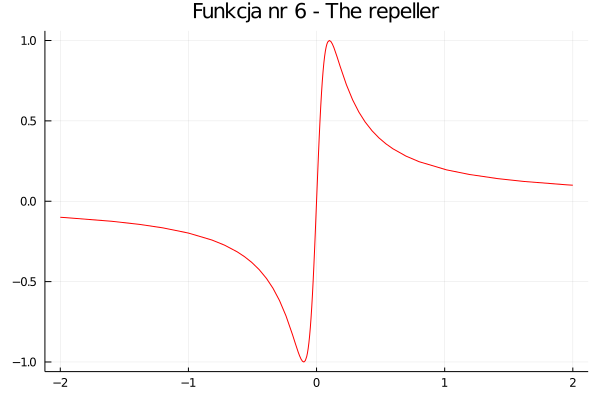

In [44]:
plot(test_functions[index][1],
    test_functions[index][2],
    test_functions[index][3],
    title = "Funkcja nr 6 - The repeller",
    label = "",
    color = :red
)


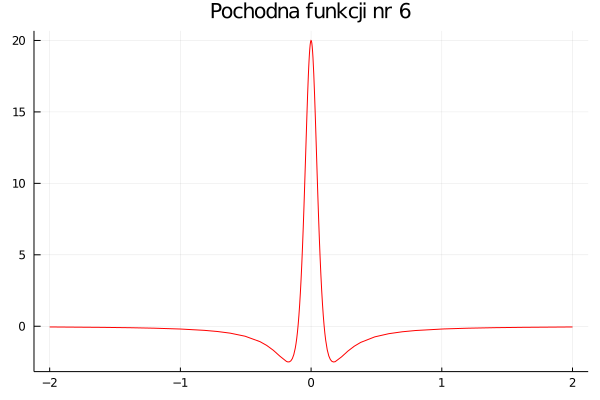

In [45]:
plot(D(test_functions[index][1]),
    test_functions[index][2],
    test_functions[index][3],
    title = "Pochodna funkcji nr 6",
    label = "",
    color = :red
)

### Metoda bisekcji:

In [46]:
p2_root1 = find_zero(
            test_functions[index][1],
            (test_functions[index][2], test_functions[index][3]), 
            Bisection(),
            verbose=true
        )

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 0, 2 )



0.0

In [47]:
println("detected root: ", p2_root1)
println("f(x): ", f6(p2_root1))
println("iszero: ",iszero(f6(p2_root1)))
println("sign(f(prevfloat(root))) * sign(f(nextfloat(root))) = ",
    sign(f6(prevfloat(p2_root1))) * 
    sign(f6(nextfloat(p2_root1))) 
)

detected root: 0.0
f(x): 0.0
iszero: true
sign(f(prevfloat(root))) * sign(f(nextfloat(root))) = -1.0


### Metoda Newtona:

In [48]:
p2_root2 = 
    find_zero(
        (test_functions[index][1], D(test_functions[index][1])), 
        test_functions[index][2], 
        Roots.Newton(),
        verbose=true)

Results of univariate zero finding:

* Converged to: -1.6833214850237586e7
* Algorithm: Roots.Newton()
* iterations: 23
* function evaluations ≈ 46
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -2,	 fx₁ = -0.099750623441396513
x₂ = -4.0100250626566414,	 fx₂ = -0.049844003065890263
x₃ = -8.0250407288643615,	 fx₃ = -0.024918122697889723
x₄ = -16.052574043958064,	 fx₄ = -0.012458577567897847
x₅ = -32.106394042372798,	 fx₅ = -0.0062292283447633531
x₆ = -64.213411019666154,	 fx₆ = -0.0031146066185278954
x₇ = -128.42713350150484,	 fx₇ = -0.0015573023650648575
x₈ = -256.854422733435,	 fx₈ = -0.00077865106450856222
x₉ = -513.70892333200004,	 fx₉ = -0.00038932551750132965
x₁₀ = -1027.4178855965547,	 fx₁₀ = -0.00019466275690654692
x₁₁ = -2054.8357906593856,	 fx₁₁ = -9.7331378222758716e-05
x₁₂ = -4109.6715910519088,	 fx₁₂ = -4.8665689082565025e-05
x₁₃ = -8219.3431869703854,	 fx₁₃ = -2.4332844537680725e-05
x₁₄ = -16438.686376374055,	 fx₁₄ = -1.2166422268390139e-05
x₁₅

-1.6833214850237586e7

In [49]:
println("root is: ", p2_root2)
println("f(x): ", f6(p2_root2))
println("iszero: ",iszero(f6(p2_root2)))
println("sign(f(prevfloat(root))) * sign(f(nextfloat(root))) = ",
    sign(f6(prevfloat(p2_root2))) * 
    sign(f6(nextfloat(p2_root2))) 
)

root is: -1.6833214850237586e7
f(x): -1.1881271746328192e-8
iszero: false
sign(f(prevfloat(root))) * sign(f(nextfloat(root))) = 1.0


### Metoda siecznych:

In [50]:
p2_root3 = find_zero(
            test_functions[index][1], 
            test_functions[index][2],   
            verbose=true
        )

Results of univariate zero finding:

* Converged to: -1.8865593260698173e7
* Algorithm: Secant()
* iterations: 35
* function evaluations ≈ 39
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = -1.9999939444722106,	 fx₁ = -0.099750923957294887
x₂ = -2,	 fx₂ = -0.099750623441396513
x₃ = -2.0006055527789428,	 fx₃ = -0.099720580969859529
x₄ = -2.0611608306732236,	 fx₄ = -0.096804837010547165
x₅ = -4.0716404504498254,	 fx₅ = -0.049090639315222291
x₆ = -6.1401176465932448,	 fx₆ = -0.032564028353809164
x₇ = -10.215844377360462,	 fx₇ = -0.019575556425547185
x₈ = -16.358569944610529,	 fx₈ = -0.012225550717048327
x₉ = -26.576004589115449,	 fx₉ = -0.0075254791459511017
x₁₀ = -42.935562136106157,	 fx₁₀ = -0.004658118006163477
x₁₁ = -69.512175917008989,	 fx₁₁ = -0.0028771878228561819
x₁₂ = -112.44811482123015,	 fx₁₂ = -0.0017785966634258814
x₁₃ = -181.9605235281293,	 fx₁₃ = -0.0010991391743479873
x₁₄ = -294.40878223630864,	 fx₁₄ = -0.00067932748271474781
x₁₅ = -476.36939468

-1.8865593260698173e7

In [51]:
println("root is: ", p2_root3)
println("f(x): ", f6(p2_root3))
println("iszero: ",iszero(f6(p2_root3)))
println("sign(f(prevfloat(root))) * sign(f(nextfloat(root))) = ",
    sign(f6(prevfloat(p2_root3))) * 
    sign(f6(nextfloat(p2_root3))) 
)

root is: -1.8865593260698173e7
f(x): -1.0601309867983364e-8
iszero: false
sign(f(prevfloat(root))) * sign(f(nextfloat(root))) = 1.0


# 3
Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

### Metoda bisekcji 

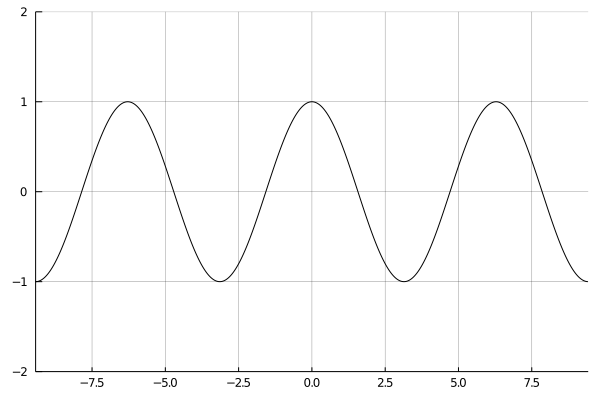

In [52]:
f_bis_range = -3*pi:0.01:3*pi
f_bis_error(x) = cos(x);



plot(f_bis_range,f_bis_error, 
    xlims=(-3*pi, 3*pi), ylims=(-2, 2), 
    color = "black", label = "",
    grid = true, gridalpha = 0.4
)

In [53]:
find_zero(
    f_bis_error,
    (-pi, pi), 
    Bisection(),
    verbose=true
)

ArgumentError: [91mArgumentError: The interval [a,b] is not a bracketing interval.[39m
[91mYou need f(a) and f(b) to have different signs (f(a) * f(b) < 0).[39m
[91mConsider a different bracket or try fzero(f, c) with an initial guess c.[39m



Metoda bisekcji w tym przypadku nie działa, ponieważ wartości na obu krańcach przedziału oraz w jego środku są tego samego znaku

In [54]:
find_zero(
    f_bis_error,
    (-pi, 0), 
    Bisection(),
    verbose=true
)

Results of univariate zero finding:

* Converged to: -1.5707963267948966
* Algorithm: Bisection()
* iterations: 61
* function evaluations ≈ 64
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( -3.1415926535897931, -1.9173874955754254e-154 )
(a₁, b₁) = ( -3.1415926535897931, -2.4666577043433137e-77 )
(a₂, b₂) = ( -3.1415926535897931, -8.8129561311880578e-39 )
(a₃, b₃) = ( -3.1415926535897931, -1.6643821264459163e-19 )
(a₄, b₄) = ( -3.1415926535897931, -7.2315285987339727e-10 )
(a₅, b₅) = ( -3.1415926535897931, -4.7664722723044622e-05 )
(a₆, b₆) = ( -3.1415926535897931, -0.012237007660092275 )
(a₇, b₇) = ( -3.1415926535897931, -0.19607083170541922 )
(a₈, b₈) = ( -3.1415926535897931, -0.78484074510956259 )
(a₉, b₉) = ( -3.1415926535897931, -1.5702389085070108 )
(a₁₀, b₁₀) = ( -2.1410352353019073, -1.5702389085070108 )
(a₁₁, b₁₁) = ( -1.8203782630789822, -1.5702389085070108 )
(a₁₂, b₁₂) = ( -1.6953085857929964, -1.5702389085070108 )
(a₁₃, b₁₃) = ( -1.632773747150

-1.5707963267948966

### Metoda Newtona

In [73]:
function isCorrectZero(f, x)
    sign(f(prevfloat(x))) * sign(f(nextfloat(x))) == -1 || iszero(f(x))
end

isCorrectZero (generic function with 1 method)

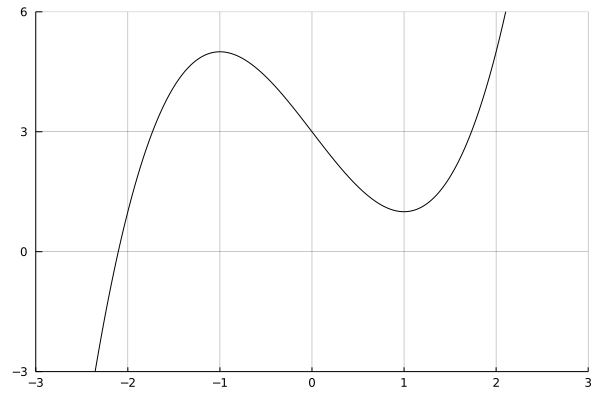

In [56]:
f_newton_range = -3:0.01:4
f_newton_error(x) = x^3 - 3*x + 3;



plot(f_newton_range,f_newton_error, 
    xlims=(-3, 3), ylims=(-3, 6), 
    color = "black", label = "",
    grid = true, gridalpha = 0.4
)

In [57]:
x = find_zero(f_newton_error, (-2.4, 2), Bisection())
println(x)
isCorrectZero(f_newton_error, x)

-2.1038034027355366


true

In [58]:
find_zero((f_newton_error, x -> ForwardDiff.derivative(f_newton_error, float(x))), 0, Roots.Newton())

Roots.ConvergenceFailed: [91mRoots.ConvergenceFailed("Algorithm failed to converge")[39m

In [59]:
find_zero((f_newton_error, x -> ForwardDiff.derivative(f_newton_error, float(x))), -1.5, Roots.Newton())

-2.1038034027355366



Metoda Newtona działa na podstawie wyznaczenia każdego kolejnego punktu jako punkt przecięcia linii stycznej do funkcji f w punkcie x. W ten sposób przybliżamy się do pierwiastka. Jednak wybór punktu startowego może spowodować, że wpadniemy np. w lokalne ekstremum, w którym nie ma pierwiastka. W takim przypadku algorytm nie znajdzie pierwiastka.


### Metoda siecznych:

In [95]:
f_secant_range = -1.5:0.01:1
f_secant_error(x) = 20.0 * x / ( 100.0 * x ^ 2 + 1.0 );
f_secant_x0 = 0.01

0.01

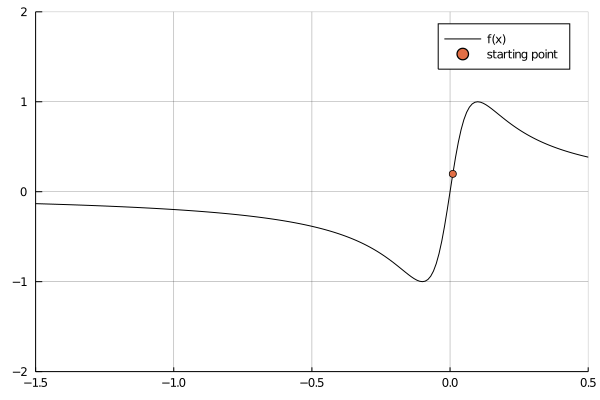

In [96]:
plot(f_secant_range,f_secant_error, 
    xlims=(-1.5, 0.5), ylims=(-2, 2), 
    color = "black", label = "f(x)",
    grid = true, gridalpha = 0.4
)

scatter!([0.01], [f_secant_error(0.01)], label="starting point")

In [99]:
# x = find_zero(f_secant_error, 0.01, Order1(),  verbose=true) 
x = Roots.secant_method(f_secant_error, (-1,0.01))

-1.366321523117875e7

In [100]:
isCorrectZero(f_secant_error, x)

false

# ZADANIE B

Narysować wstegę Newtona i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)